<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [57]:
import numpy as np
import modin.pandas as pd
import seaborn               as sns
#import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
df_std = df.iloc[6500000:,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
6500000,2.0,11330521.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,202001,1,40000000.0,1,82000.0,3831791.31,PEDRAZA,75,5.155400e+05
6500001,2.0,12562229.29,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,B,M,...,3,201904,1,40000000.0,4,0.0,3831791.31,PEDRAZA,74,3.327700e+05
6500002,2.0,11555331.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,201909,1,40000000.0,9,223000.0,3831791.31,PEDRAZA,74,5.994400e+05
6500003,2.0,9371320.00,3622610.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,B,M,...,12,202004,1,19500000.0,4,5948000.0,0.00,PEDRAZA,42,4.600000e+03
6500004,2.0,6519869.00,2941320.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,C,M,...,10,201911,0,0.0,11,27617000.0,0.00,PEDRAZA,41,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.00,PUERRES,47,7.431714e+05
9527189,3.0,26913722.00,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.00,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.00,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.00,MURILLO,47,7.853290e+05
9527191,2.0,14481371.00,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.00,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [8]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    3027193
dtype: int64

## Best Variables

In [10]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:16]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL']

In [11]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
                     'gasto_familiar']

In [12]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,periodo,profesion_AUXILIAR DE ODONTOLOGIA,profesion_BACTERIOLOGIA,profesion_CARRERA MILITAR,profesion_COMERCIO INTERNACIONAL,gasto_familiar
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,44,1,202001,0,0,0,0,5.155400e+05
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,44,1,201904,0,0,0,0,3.327700e+05
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,44,1,201909,0,0,0,0,5.994400e+05
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,55,1,202004,0,0,0,0,4.600000e+03
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,55,1,201911,0,0,0,0,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,44,1,202011,0,0,0,0,7.431714e+05
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,47,2,202011,0,0,1,0,8.502165e+05
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,46,1,202011,0,0,0,0,7.853290e+05
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,64,1,202011,0,0,0,0,1.029045e+06


## Normalization

In [13]:
Estandar = StandardScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,3027193.0,0.0,1.0,-2.20,-0.74,-0.74,0.71,5.07
1,3027193.0,0.0,1.0,-0.52,-0.32,-0.19,0.05,702.85
2,3027193.0,-0.0,1.0,-0.49,-0.49,-0.49,0.24,150.99
3,3027193.0,0.0,1.0,-3.07,0.12,0.12,0.12,2.66
4,3027193.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5,3027193.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
6,3027193.0,0.0,1.0,-1.70,-0.90,-0.10,1.10,1.10
7,3027193.0,0.0,1.0,-0.97,-0.97,-0.97,1.03,1.03
8,3027193.0,-0.0,1.0,-0.99,-0.99,0.10,1.19,1.19
9,3027193.0,-0.0,1.0,-2.74,-0.11,-0.11,0.57,2.04


In [14]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [15]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(2745527,)


## Train_Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
260499,-0.743914,-0.148713,-0.494376,1.390745,0.0,0.0,1.099982,-0.968532,-0.991231,1.363740,-0.095622,-0.998781,-0.024601,-0.062996,-0.053473,-0.095336
1526298,-0.743914,-0.350103,-0.494376,0.117366,0.0,0.0,-0.100046,-0.968532,-0.991231,-0.106108,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336
1229305,0.709494,-0.098812,-0.494376,0.117366,0.0,0.0,0.699973,1.032491,-0.991231,-2.555856,-0.095622,0.934175,-0.024601,-0.062996,-0.053473,-0.095336
10049,-0.743914,0.012290,0.192414,0.117366,0.0,0.0,-1.700083,-0.968532,-0.991231,-0.106108,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336
153504,0.709494,-0.177801,0.012126,1.390745,0.0,0.0,-1.300073,1.032491,1.186677,-0.106108,4.785346,0.853635,-0.024601,-0.062996,-0.053473,-0.095336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283491,-0.743914,-0.089205,-0.494376,1.390745,0.0,0.0,0.699973,-0.968532,-0.991231,-0.106108,-0.095622,0.893905,-0.024601,-0.062996,-0.053473,-0.095336
599912,-0.743914,-0.257064,0.333045,0.117366,0.0,0.0,-1.300073,1.032491,-0.991231,-0.106108,-0.095622,-0.958511,-0.024601,-0.062996,-0.053473,-0.095336
1972045,2.162902,-0.282109,-0.494376,0.117366,0.0,0.0,1.099982,-0.968532,-0.991231,-0.106108,-2.536106,-1.099456,-0.024601,-0.062996,-0.053473,-0.095336
1815143,-0.743914,-0.168323,0.417327,0.117366,0.0,0.0,1.099982,1.032491,-0.991231,-0.106108,-0.095622,-1.039051,-0.024601,-0.062996,-0.053473,-0.095336


In [17]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [18]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(32, input_dim=16, kernel_initializer='normal',activation='linear'))
model.add(Dense(64, kernel_initializer='normal',activation='linear'))
model.add(Dense(30, kernel_initializer='normal',activation='linear'))
model.add(Dense(15, kernel_initializer='normal',activation='linear'))
model.add(Dense(7, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 5,191
Trainable params: 5,191
Non-trainable params: 0
______________________________________________________

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [21]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [22]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 746us/step - loss: 1.1018 - mean_absolute_percentage_error: 269.8250
loss :  1.1017773151397705
mean_absolute_percentage_error :  269.824951171875


## Submission

In [23]:
y_hat = model.predict(x_val)
y_hat

array([[ 0.15882975],
       [-0.05760279],
       [ 0.15848638],
       ...,
       [ 0.33795175],
       [ 0.32518777],
       [ 0.12447836]], dtype=float32)

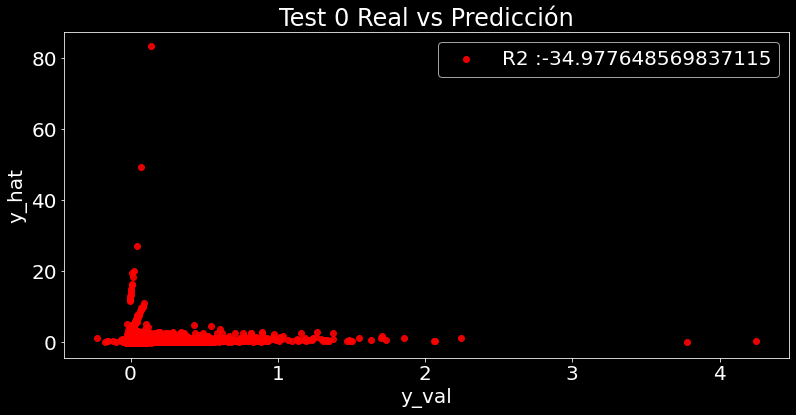

In [73]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [67]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.709494,-0.013736,1.942433,0.117366,0.0,0.0,1.099982,1.032491,1.186677,-0.473570,2.344862,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.158830
1,-0.743914,-0.278269,0.292906,0.117366,0.0,0.0,-1.700083,1.032491,-0.991231,0.567573,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,-0.057603
2,0.709494,0.041748,1.516430,0.117366,0.0,0.0,1.099982,1.032491,1.186677,-0.106108,2.344862,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.158486
3,-0.743914,-0.131318,-0.494376,0.117366,0.0,0.0,-1.300073,1.032491,0.097723,0.016379,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,-0.050751
4,2.162902,0.431983,-0.494376,0.117366,0.0,0.0,1.099982,-0.968532,0.097723,1.914934,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.190244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.709494,-0.113942,0.275967,0.117366,0.0,0.0,1.099982,-0.968532,-0.991231,-0.106108,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.078845
281662,2.162902,2.312327,4.555816,0.117366,0.0,0.0,-0.100046,1.032491,0.097723,0.077623,2.344862,1.054985,-0.024601,-0.062996,18.701201,-0.095336,0.516864
281663,2.162902,1.194608,-0.494376,1.390745,0.0,0.0,-0.900064,1.032491,0.097723,0.016379,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.337952
281664,0.709494,1.002967,3.529430,0.117366,0.0,0.0,0.699973,-0.968532,1.186677,1.118766,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.325188


In [68]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.016442e+06
1         6.907330e+05
2         1.015926e+06
3         7.010436e+05
4         1.063717e+06
              ...     
281661    8.960739e+05
281662    1.555248e+06
281663    1.286003e+06
281664    1.266795e+06
281665    9.647469e+05
Name: 16, Length: 281666, dtype: float64

In [69]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.016442e+06
1,12598#201902,6.907330e+05
2,23697#201902,1.015926e+06
3,23768#201902,7.010436e+05
4,7174#201902,1.063717e+06
...,...,...
281661,8596193#202011,8.960739e+05
281662,8616083#202011,1.555248e+06
281663,8670207#202011,1.286003e+06
281664,8677655#202011,1.266795e+06


In [70]:
n = 30
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN30.csv'

In [71]:
np.mean(sub['gasto_familiar'])

931219.5477481886

In [72]:
sub.to_csv(sub_name, index=False)

# Test 1

In [74]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

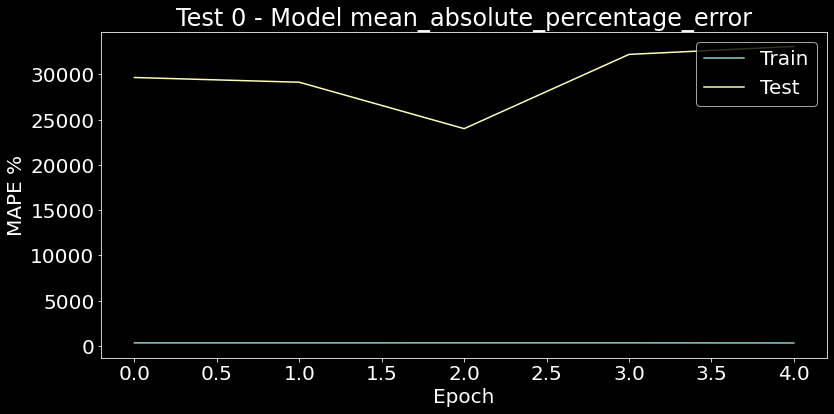

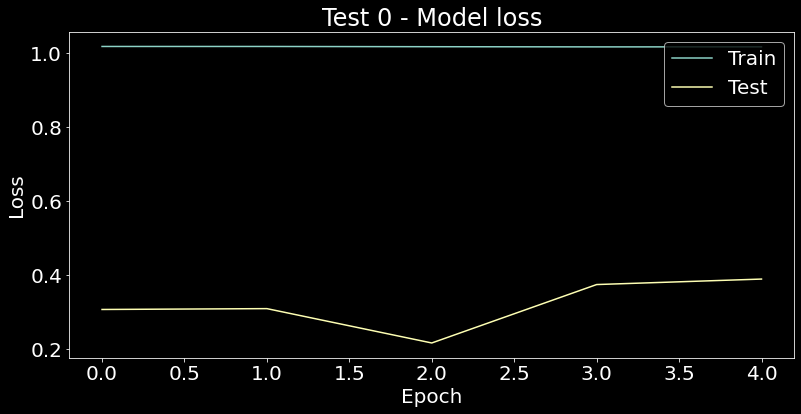

In [75]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 0 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 0 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [76]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 731us/step - loss: 1.0881 - mean_absolute_percentage_error: 409.7845
loss :  1.0880500078201294
mean_absolute_percentage_error :  409.78448486328125


# Submission

In [77]:
y_hat = model.predict(x_val)
y_hat

array([[ 0.2383076 ],
       [-0.1734651 ],
       [ 0.2424134 ],
       ...,
       [ 0.56118387],
       [ 0.50699353],
       [ 0.16669813]], dtype=float32)

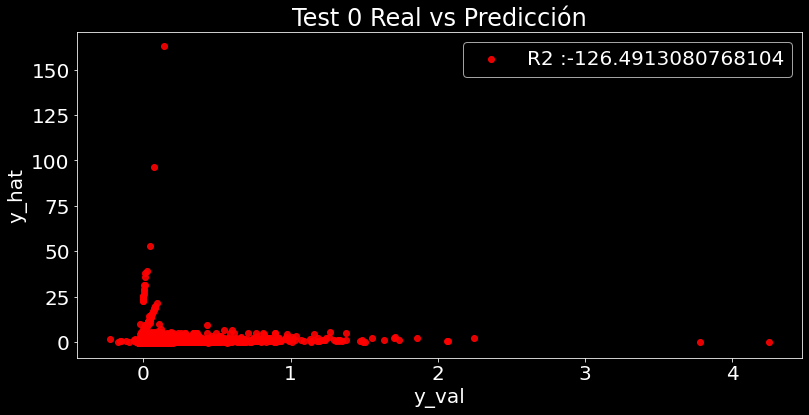

In [78]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [79]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.709494,-0.013736,1.942433,0.117366,0.0,0.0,1.099982,1.032491,1.186677,-0.473570,2.344862,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.238308
1,-0.743914,-0.278269,0.292906,0.117366,0.0,0.0,-1.700083,1.032491,-0.991231,0.567573,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,-0.173465
2,0.709494,0.041748,1.516430,0.117366,0.0,0.0,1.099982,1.032491,1.186677,-0.106108,2.344862,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.242413
3,-0.743914,-0.131318,-0.494376,0.117366,0.0,0.0,-1.300073,1.032491,0.097723,0.016379,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,-0.145753
4,2.162902,0.431983,-0.494376,0.117366,0.0,0.0,1.099982,-0.968532,0.097723,1.914934,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.288272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.709494,-0.113942,0.275967,0.117366,0.0,0.0,1.099982,-0.968532,-0.991231,-0.106108,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.053389
281662,2.162902,2.312327,4.555816,0.117366,0.0,0.0,-0.100046,1.032491,0.097723,0.077623,2.344862,1.054985,-0.024601,-0.062996,18.701201,-0.095336,0.992625
281663,2.162902,1.194608,-0.494376,1.390745,0.0,0.0,-0.900064,1.032491,0.097723,0.016379,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.561184
281664,0.709494,1.002967,3.529430,0.117366,0.0,0.0,0.699973,-0.968532,1.186677,1.118766,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.506994


In [80]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.136049e+06
1         5.163717e+05
2         1.142227e+06
3         5.580764e+05
4         1.211240e+06
              ...     
281661    8.577653e+05
281662    2.271222e+06
281663    1.621945e+06
281664    1.540394e+06
281665    1.028283e+06
Name: 16, Length: 281666, dtype: float64

In [81]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.136049e+06
1,12598#201902,5.163717e+05
2,23697#201902,1.142227e+06
3,23768#201902,5.580764e+05
4,7174#201902,1.211240e+06
...,...,...
281661,8596193#202011,8.577653e+05
281662,8616083#202011,2.271222e+06
281663,8670207#202011,1.621945e+06
281664,8677655#202011,1.540394e+06


In [82]:
n = 31
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN31.csv'

In [83]:
np.mean(sub['gasto_familiar'])

966969.3704485345

In [84]:
sub.to_csv(sub_name, index=False)

# Test 2

In [85]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


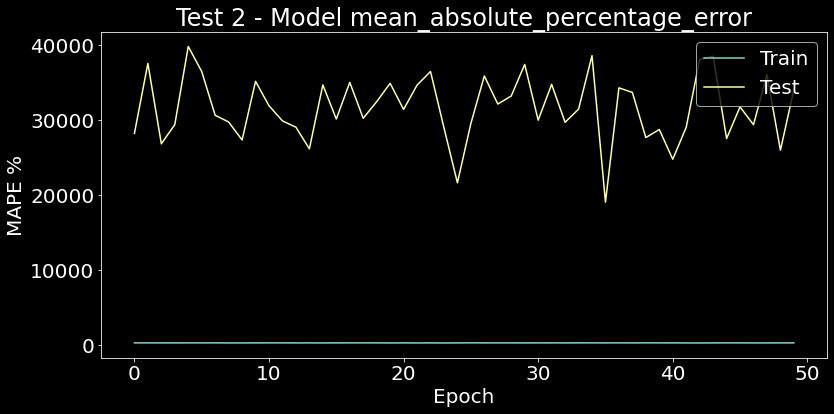

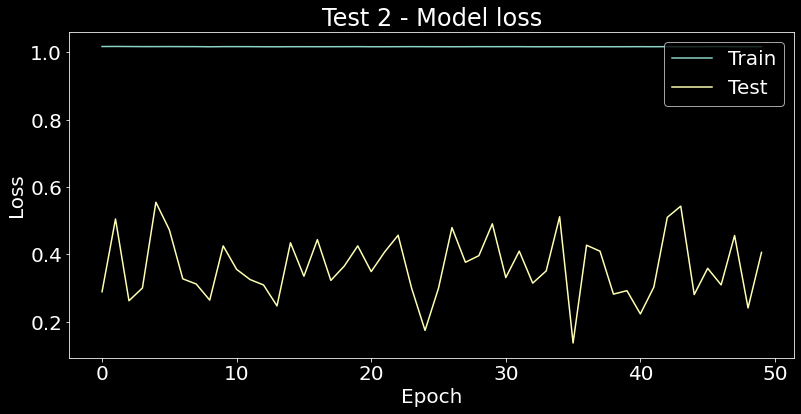

In [86]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [87]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 18s 710us/step - loss: 1.0875 - mean_absolute_percentage_error: 388.5648
loss :  1.087475299835205
mean_absolute_percentage_error :  388.5647888183594


# Submission

In [88]:
y_hat = model.predict(x_val)
y_hat

array([[ 0.21308894],
       [-0.14739512],
       [ 0.218907  ],
       ...,
       [ 0.5598322 ],
       [ 0.48068273],
       [ 0.1628156 ]], dtype=float32)

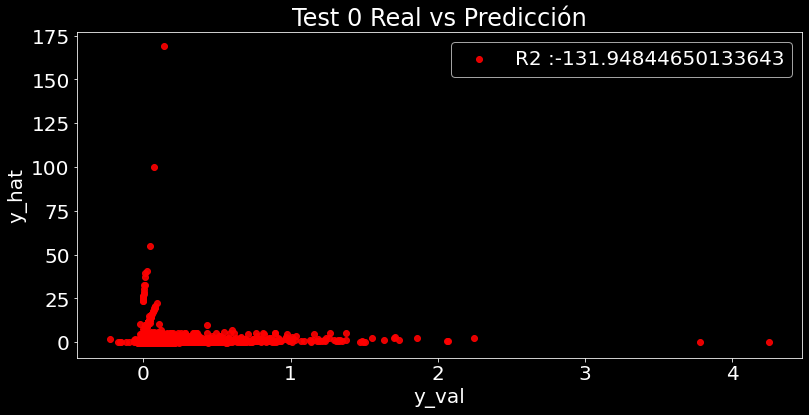

In [89]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [90]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.709494,-0.013736,1.942433,0.117366,0.0,0.0,1.099982,1.032491,1.186677,-0.473570,2.344862,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.213089
1,-0.743914,-0.278269,0.292906,0.117366,0.0,0.0,-1.700083,1.032491,-0.991231,0.567573,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,-0.147395
2,0.709494,0.041748,1.516430,0.117366,0.0,0.0,1.099982,1.032491,1.186677,-0.106108,2.344862,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.218907
3,-0.743914,-0.131318,-0.494376,0.117366,0.0,0.0,-1.300073,1.032491,0.097723,0.016379,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,-0.116456
4,2.162902,0.431983,-0.494376,0.117366,0.0,0.0,1.099982,-0.968532,0.097723,1.914934,-0.095622,-1.139726,-0.024601,-0.062996,-0.053473,-0.095336,0.300730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.709494,-0.113942,0.275967,0.117366,0.0,0.0,1.099982,-0.968532,-0.991231,-0.106108,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.042765
281662,2.162902,2.312327,4.555816,0.117366,0.0,0.0,-0.100046,1.032491,0.097723,0.077623,2.344862,1.054985,-0.024601,-0.062996,18.701201,-0.095336,0.942917
281663,2.162902,1.194608,-0.494376,1.390745,0.0,0.0,-0.900064,1.032491,0.097723,0.016379,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.559832
281664,0.709494,1.002967,3.529430,0.117366,0.0,0.0,0.699973,-0.968532,1.186677,1.118766,-0.095622,1.054985,-0.024601,-0.062996,-0.053473,-0.095336,0.480683


In [91]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.098097e+06
1         5.556045e+05
2         1.106853e+06
3         6.021643e+05
4         1.229989e+06
              ...     
281661    8.417768e+05
281662    2.196415e+06
281663    1.619911e+06
281664    1.500799e+06
281665    1.022441e+06
Name: 16, Length: 281666, dtype: float64

In [92]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.098097e+06
1,12598#201902,5.556045e+05
2,23697#201902,1.106853e+06
3,23768#201902,6.021643e+05
4,7174#201902,1.229989e+06
...,...,...
281661,8596193#202011,8.417768e+05
281662,8616083#202011,2.196415e+06
281663,8670207#202011,1.619911e+06
281664,8677655#202011,1.500799e+06


In [93]:
n = 32
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN32.csv'

In [94]:
np.mean(sub['gasto_familiar'])

969782.098146457

In [95]:
sub.to_csv(sub_name, index=False)

# Test 3

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [ ]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

## Submission

In [ ]:
y_hat = model.predict(x_val)
y_hat

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [ ]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

In [ ]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

In [ ]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

In [ ]:
n = 33
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

In [ ]:
np.mean(sub['gasto_familiar'])

In [ ]:
sub.to_csv(sub_name, index=False)

# Test 4

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [ ]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

## Submission

In [ ]:
y_hat = model.predict(x_val)
y_hat

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [ ]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

In [ ]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

In [ ]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

In [ ]:
n = 34
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

In [ ]:
np.mean(sub['gasto_familiar'])

In [ ]:
sub.to_csv(sub_name, index=False)

# Test 5

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



In [ ]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

# Submission

In [ ]:
y_hat = model.predict(x_val)
y_hat

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [ ]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

In [ ]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

In [ ]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

In [ ]:
n = 35
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

In [ ]:
np.mean(sub['gasto_familiar'])

In [ ]:
sub.to_csv(sub_name, index=False)